Compare to https://github.com/space-physics/igrf

In [1]:
%matplotlib widget

In [2]:
from datetime import datetime

import igrf
import igrf.plots
from IPython.display import IFrame
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import matplotlib.pyplot as plt

In [3]:
date = datetime(2018, 5, 23)
altkm = 0

isv = 0
itype = 1

In [4]:
glat, glon = igrf.utils.latlonworldgrid()

In [5]:
mag = igrf.grid(date, glat, glon, altkm, isv=isv, itype=itype)

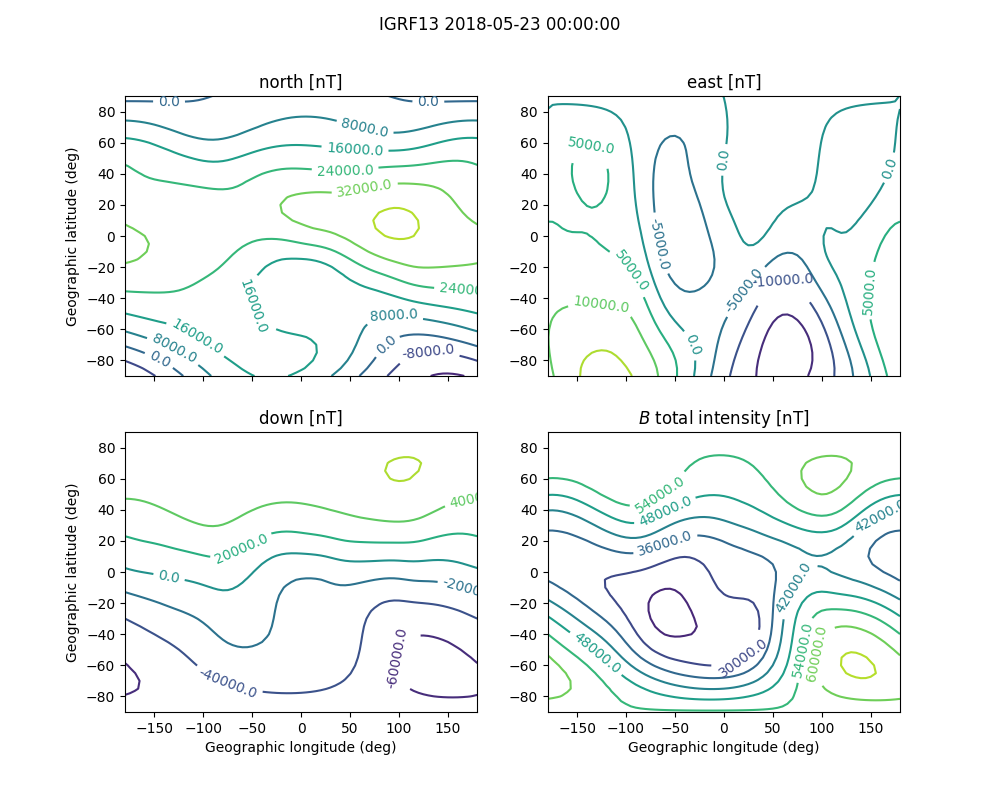

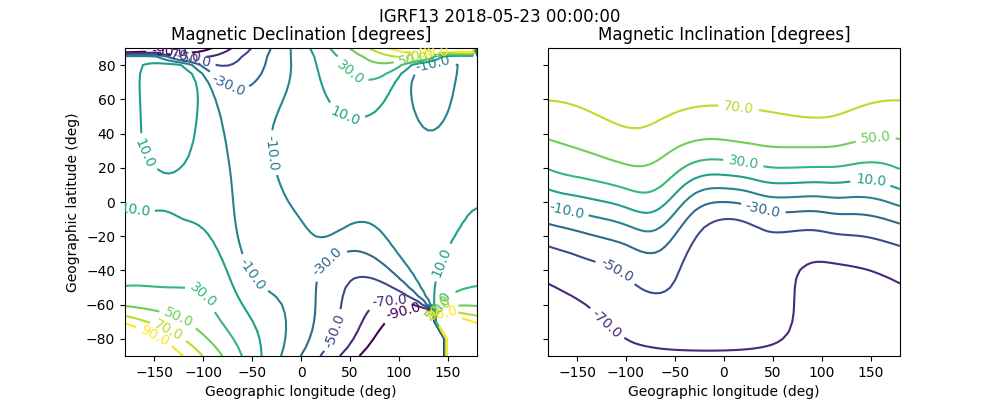

In [6]:
igrf.plots.plotigrf(mag, '13')

In [7]:
mag = igrf.igrf('2010-07-12', glat=65, glon=-148, alt_km=100)

In [8]:
mag

<xarray.Dataset>
Dimensions:  (alt_km: 1)
Coordinates:
  * alt_km   (alt_km) int64 100
Data variables:
    north    (alt_km) float64 1.122e+04
    east     (alt_km) float64 4.148e+03
    down     (alt_km) float64 5.302e+04
    total    (alt_km) float64 5.436e+04
    incl     (alt_km) float64 77.29
    decl     (alt_km) float64 20.29
Attributes:
    time:     2010-07-12
    isv:      0
    itype:    1
    glat:     65
    glon:     -148

In [9]:
mag.decl.data

array([20.29078538])

## Reproduction

https://www.ngdc.noaa.gov/geomag/WMM/data/WMM2015/WMM2015_D_MERC.pdf

In [10]:
IFrame('WMM2015_D_MERC.pdf', width=800, height=600)

In [11]:
date = datetime(2015, 1, 1)
mag = igrf.grid(date, glat, glon, altkm, isv=isv, itype=itype)

/usr/local/lib/python3.11/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


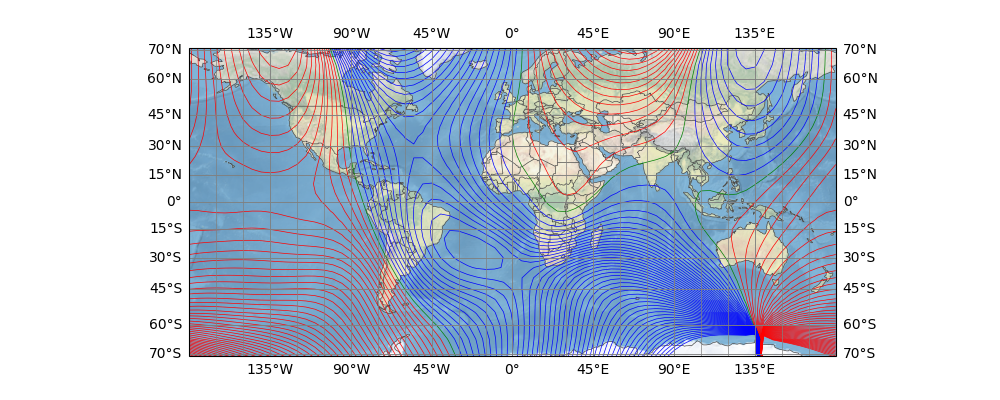

In [15]:
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Miller())
ax.set_extent([-180, 180, -70.5, 70.5])
ax.stock_img()
ax.add_feature(cfeature.COASTLINE, color='0.3', lw=0.5)
ax.add_feature(cfeature.BORDERS, color='0.3', lw=0.5)
ax.gridlines(draw_labels=False, 
             xlocs=np.arange(-180, 181, 15), 
             ylocs=[-70, -60, -45, -30, -15, 0, 15, 30, 45, 60, 70],
             color='0.5', lw=0.5)
ax.gridlines(draw_labels=True, 
             xlocs=[-180, -135, -90, -45, 0, 45, 90, 135, 180], 
             ylocs=[-70, -60, -45, -30, -15, 0, 15, 30, 45, 60, 70],
             color='0.5', lw=0.5)
#c = ax.contour(mag.glon, mag.glat, mag.decl, range(-90, 90 + 2, 2), transform=ccrs.PlateCarree(), cmap='seismic', linewidths=0.5)
#fig.colorbar(c, ax=ax)
ax.contour(mag.glon, mag.glat, mag.decl, range(2, 90 + 2, 2), transform=ccrs.PlateCarree(), linewidths=0.5, colors='r')
ax.contour(mag.glon, mag.glat, mag.decl, [0], transform=ccrs.PlateCarree(), linewidths=0.5, colors='g')
ax.contour(mag.glon, mag.glat, mag.decl, range(-90, 0, 2), transform=ccrs.PlateCarree(), linewidths=0.5, negative_linestyles='solid', colors='b')